In [1]:
# Loading already preprocessed data from keras datasets
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10_000) # num words keeps only the X most frequently occurring words

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(f"train shape: {x_train.shape}\nfirst datapoint: {x_train[0]}")

train shape: (25000,)
first datapoint: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# Multi-hot encode, because of different lenghts of the reviews
import numpy as np
def vectorize_sequences(sequences, dimensions=10_000):
    results = np.zeros(shape=(len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # maps sequence integers into 1 on integer index (j) in sequence i
    return results

In [5]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

print(f"first datapoint; {x_train[0]}")

first datapoint; [0. 1. 1. ... 0. 0. 0.]


In [7]:
# vectorize labels
y_train = np.asarray(y_train).astype("float32")
y_test = np.asarray(y_test).astype("float32")

In [9]:
# building the model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid") # binary classification                    
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
# creating an validation set
x_val = x_train[:10_000]
y_val = y_train[:10_000]

# extract them from train data
x_train = x_train[10_000:]
y_train = y_train[10_000:]

In [12]:
# training
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 43ms/step - loss: 0.5236 - accuracy: 0.7937 - val_loss: 0.3957 - val_accuracy: 0.8667
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3181 - accuracy: 0.8982 - val_loss: 0.3207 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2328 - accuracy: 0.9241 - val_loss: 0.2778 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1821 - accuracy: 0.9401 - val_loss: 0.2724 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1448 - accuracy: 0.9538 - val_loss: 0.2917 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1247 - accuracy: 0.9611 - val_loss: 0.2906 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0997 - accuracy: 0.9699 - val_loss: 0.3055 - val_accuracy: 0.8846
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

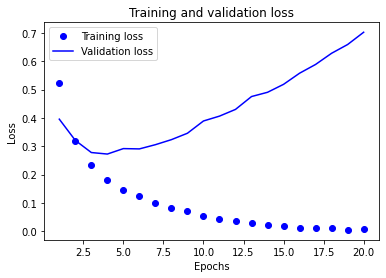

In [14]:
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
loss_values_val = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss") # bo => blue dot
plt.plot(epochs, loss_values_val, "b", label="Validation loss") # b => solid blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

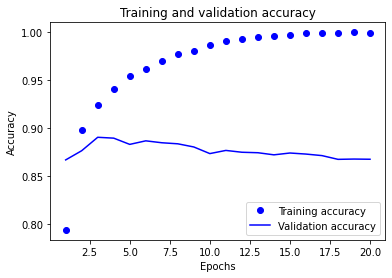

In [16]:
acc_values = history_dict["accuracy"]
acc_values_val = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training accuracy")
plt.plot(epochs, acc_values_val, "b", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

In [17]:
# the model is overfitting (after 4 epochs), instead of you using a callack we
# train a new model (just for practice)
model = Sequential([
                    Dense(16, activation="relu"),
                    Dense(16, activation="relu"),
                    Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 32ms/step - loss: 0.5451 - accuracy: 0.7792 - val_loss: 0.4096 - val_accuracy: 0.8712
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3288 - accuracy: 0.8986 - val_loss: 0.3176 - val_accuracy: 0.8848
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2381 - accuracy: 0.9230 - val_loss: 0.2917 - val_accuracy: 0.8847
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1887 - accuracy: 0.9364 - val_loss: 0.2726 - val_accuracy: 0.8913


In [19]:
model.predict(x_test)

array([[0.25251505],
       [0.9976253 ],
       [0.9154281 ],
       ...,
       [0.11241412],
       [0.15367842],
       [0.5758323 ]], dtype=float32)